# Домашнее задание по теме «Классические модели ML»

В этом домашнем задании разберём обучение без учителя и кластеризацию.

## Повторение теории

Всё, что мы делали на курсе до этого момента, входило в пространство задач обучения с учителем (англ. supervised learning), но в ML также существует обучение без учителя (англ. unsupervised learning).

> **Обучение с учителем** — процесс обучения на размеченном датасете (с
правильными ответами).

> **Обучение без учителя** — процесс обучения на неразмеченном датасете (без правильных ответов). Основная цель — выявление скрытых структур или закономерностей в данных.

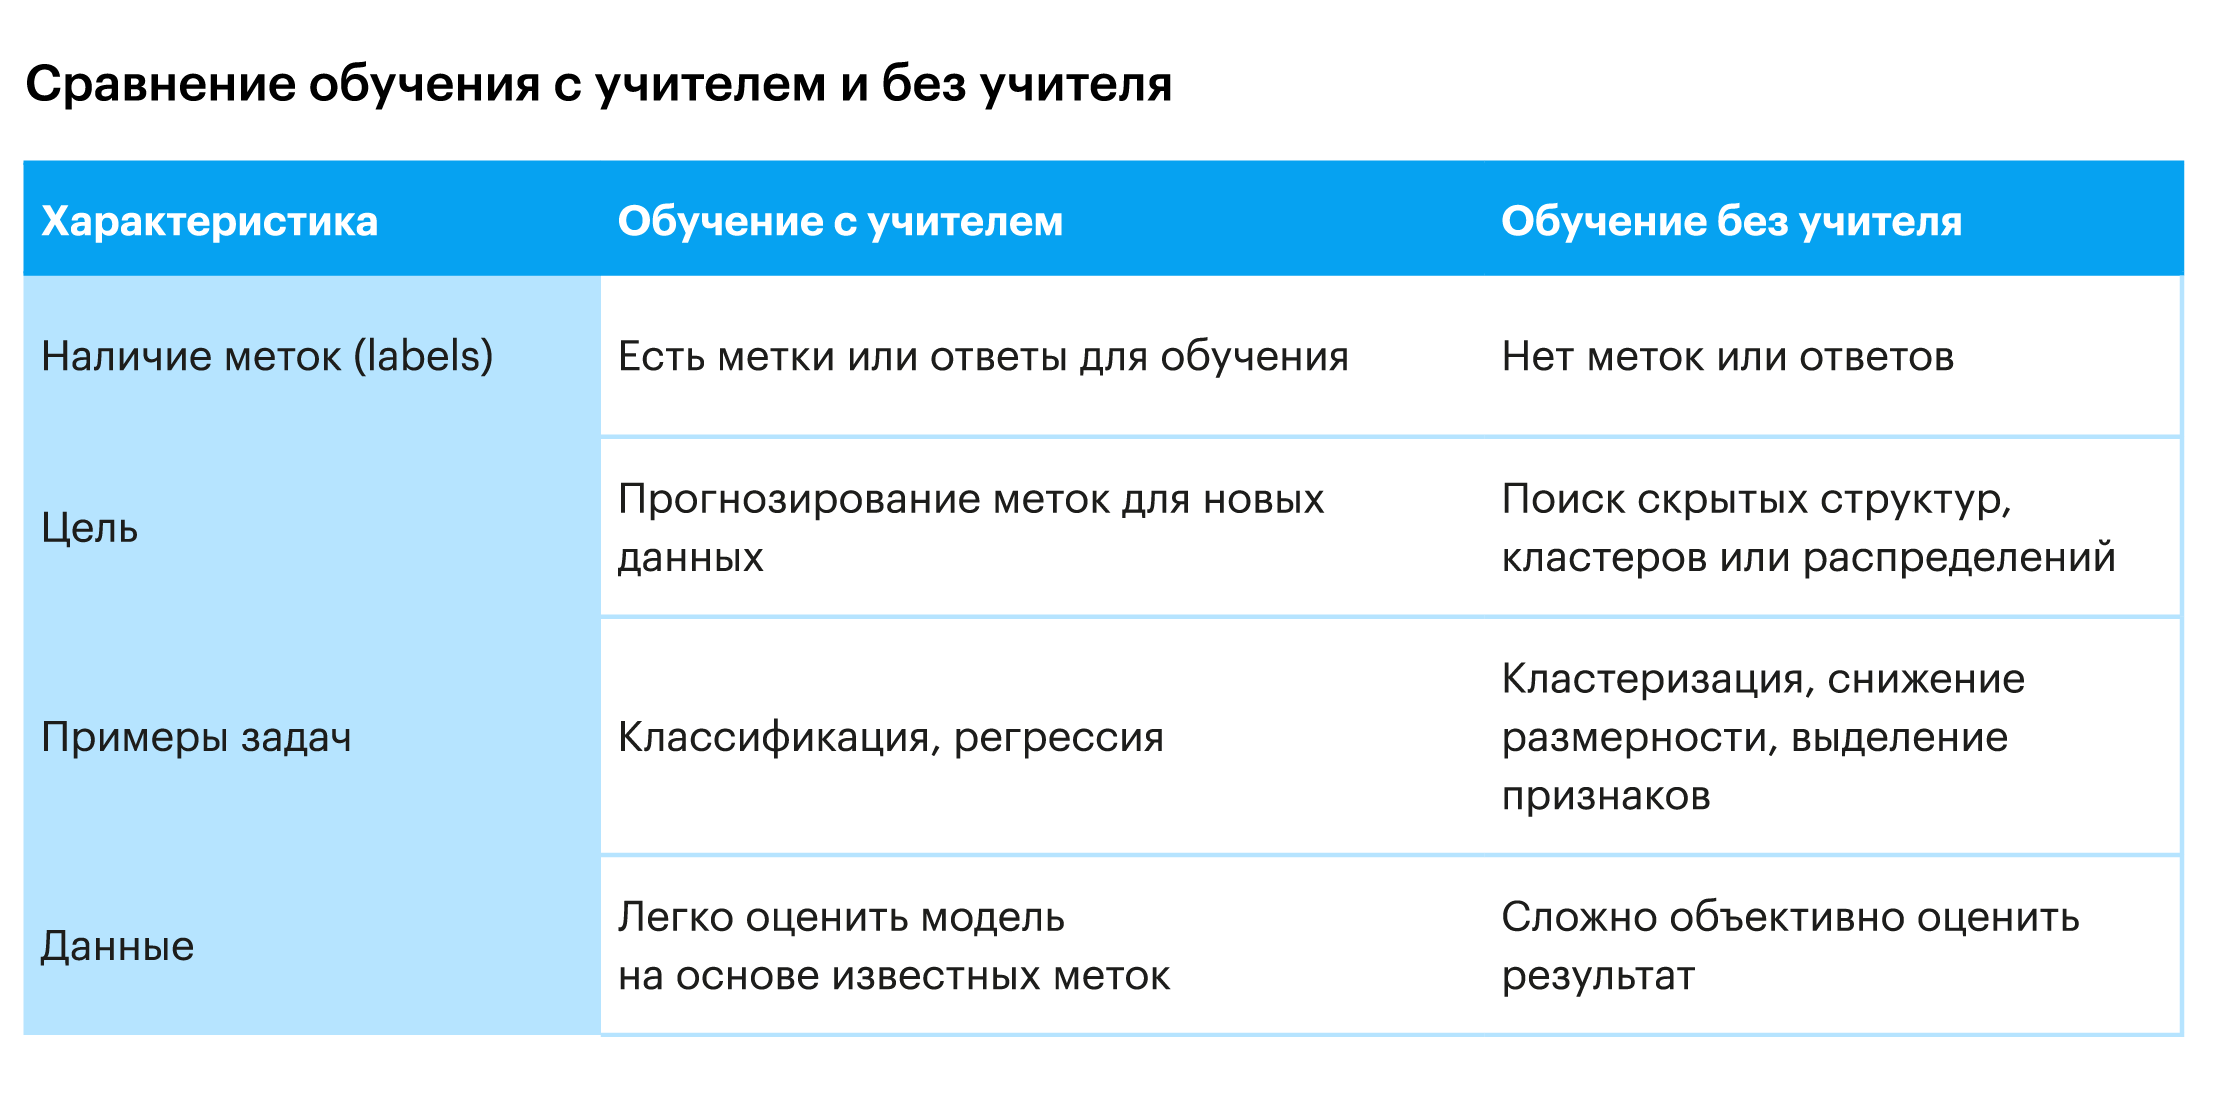

В рамках этого домашнего задания ты глубже погрузишься в одну из задач обучения без учителя, а именно — кластеризацию.

## Кластеризация

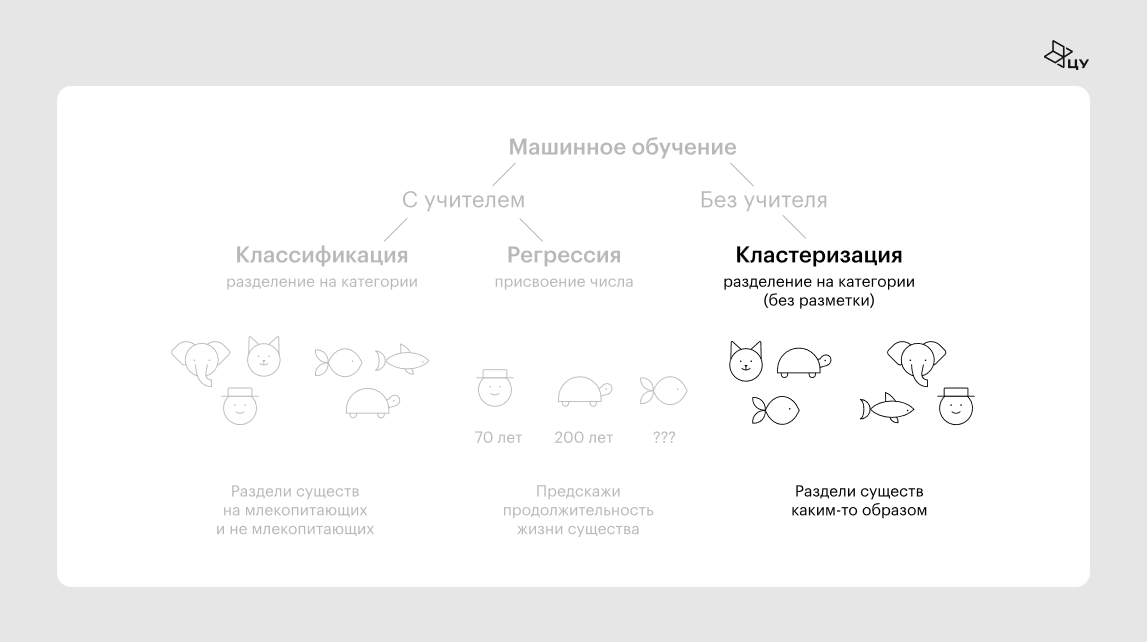

> **Кластеризация** — задача разделения объектов на
несколько категорий в случае, когда в
датасете нет таргетов классов.

Разделение нужно произвести так, чтобы:

* **внутрикластерное сходство** было максимальным (объекты внутри одного кластера должны быть максимально похожи друг на друга);
* **межкластерное различие** было максимальным (объекты из разных кластеров должны быть максимально различными).

Кластеризация похожа на
классификацию, но без известных
кластеров и их количества. Модель
должна сама определить оптимальное
разделение объектов.


Если нужно оценить качество разбиения данных на кластеры, то в случае обучения без учителя мы можем использовать:

1. **Внутренние метрики**

Оценивают качество кластеров, основываясь только на характеристиках данных и их распределений, например, через расчёт среднего отклонения точек от центров кластеров.
2. **Внешние метрики**

Сравнивают предсказанные кластеры с истинным распределением объектов. При использовании внешних метрик мы как будто «хакаем» задачу кластеризации, используя реальную целевую переменную, которую мы откуда-то получили.

**К внешним метрикам относятся:**
* [Adjusted Rand Index (ARI)](https://www.sciencedirect.com/science/article/abs/pii/B9780323885065501285);
* [Normalized Mutual Information (NMI)](https://www.nature.com/articles/s41598-024-59073-9#:~:text=The%20NMI%20serves%20as%20a,between%20two%20partitions%20or%20communities.);
* F-measure;
* все остальные классические метрики машинного обучения.

### Коэффициент силуэта

Одна из популярных внутренних метрик — это коэффициент силуэта (англ. silhouette score), который стремится вычислить, насколько хорошо каждый объект принадлежит своему кластеру по сравнению с соседними кластерами.

$$ s = \frac{b-a}{max(a, b)},$$

где $a$ — среднее расстояние между объектами одного кластера; \\
$b$ — среднее расстояние между объектами ближайших соседних кластеров.

Значение $s$ лежит в диапазоне [−1; 1]. Чем ближе к 1, тем лучше.


## K-Means

Один из наиболее популярных и простых алгоритмов кластеризации — это K-Means и его вариации (mini-batch K-Means / K-Means++).

**Классический алгоритм K-Means**

1. Есть изначальный датасет $D$, который мы хотим использовать в качестве обучающей выборки. Алгоритм К-means предполагает, что мы yже ознакомились с датасетом и представляем, на сколько кластеров нужно разбить наш датасет. Мы самостоятельно выбираем гиперпараметр $N$ — количество кластеров, на которые нужно разбить нашу выборку, и указываем его при инициализации модели.
2. Далее мы случайным образом фиксируем центры наших будущих кластеров (**центроиды**) в пространстве нашей выборки. Количество центроидов — $N$.
3. Для каждого наблюдения из $D$ мы рассчитываем евклидово расстояние до каждого центроида, разбивая таким образом наши наблюдения на кластеры. Наблюдение попадёт в тот кластер, чей центроид к нему ближе всего.
4. Перемещаем центроид в центр кластера, к которому он относится.
5. Повторяем шаги З и 4 до тех пор, пока центроиды «не сойдутся» (до этого момента центроиды перемещаются в пространстве, а при схождении колеблются вокруг одной точки).

Чтобы рассчитать растояния между объектами, K-Means использует евклидово расстояние.

> **[Евклидово расстояние](https://habr.com/ru/articles/579914/)** — это мера, используемая для определения «прямого» расстояния между двумя точками в пространстве. Его также называют длиной отрезка между точками.

В $n$-мерном пространстве его формула выглядит следующим образом:

$$ d = \sqrt{Σ_{i=1}^n(x_i-y_i)^2}.$$

С отличной интерактивной визуализацией  K-Means можно ознакомиться [здесь](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

**Преимущества K-Means**

* K-Means легко реализуется и работает быстро, особенно на больших данных.
* Алгоритм хорошо работает на плотных и компактных кластерах, например, подходит для данных с чёткими, круглыми кластерами.
* K-Means легко интерпретируется.

**Недостатки K-Means**

* K-Means крайне чувствителен к изначальной инициализации центроидов:
 * Вариация K-Means++ решает эту проблему, выбирая начальные центроиды более разумно.
* K-Means не подходит для произвольных форм кластеров.
* Алгоритм требует задать параметр $k$ — количество кластеров. В реальности определение оптимального количества кластеров может быть нетривиальной задачей:
 * Вариация: метод локтя или коэффициент силуэта помогают выбрать $k$.
* K-Means крайне чувствителен к выбросам.
* Если в данных есть кластеры с разными плотностями, результат работы K-Means, скорее всего, будет неудовлетворительным.

### Задача 1 [1,5 баллов]

Реализуй классический алгоритм K-Means и расcчитай коэффициент силуэта для получившихся кластеров. **[1,5 баллов]**

In [211]:
import numpy as np
from sklearn.metrics import silhouette_score  # Для расчёта коэффициента силуэта

In [212]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        """
        Инициализация алгоритма K-Means.
        n_clusters: количество кластеров.
        max_iter: максимальное количество итераций для оптимизации.
        tol: критерий сходимости для остановки алгоритма.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        """
        Основной метод обучения. Находит кластеры и центроиды в данных X.
        X: входные данные (numpy-массив, размер [n_samples, n_features]).
        """
        n_samples, n_features = X.shape  # Количество образцов и признаков
        rng = np.random.default_rng()  # Генератор случайных чисел

        # Инициализация центроидов: выбираем случайные точки из данных
        self.centroids = X[rng.choice(n_samples, self.n_clusters, replace=False)]

        for _ in range(self.max_iter):  # Основной цикл алгоритма (максимум max_iter итераций)
            # Назначаем точки ближайшим центроидам
            self.labels = self._assign_clusters(X)
            # Пересчитываем центроиды как среднее всех точек в кластере
            new_centroids = self._compute_centroids(X)

            # Проверяем, насколько изменились центроиды. Если изменение меньше tol, выходим из цикла
            if np.linalg.norm(new_centroids-self.centroids) < self.tol:
                break

            # Обновляем центроиды
            self.centroids = new_centroids

        return self

    def _assign_clusters(self, X):
        """
        Назначение каждой точки ближайшему центроиду.
        X: входные данные (numpy-массив).
        Возвращает массив меток кластеров для каждой точки.
        """
        # Вычисляем расстояния от каждой точки до каждого центроида (np.linalg.norm)
        distances = np.linalg.norm(X[:, np.newaxis]-self.centroids, axis=2)
        # Выбираем и возвращаем индекс ближайшего центроида (минимальное расстояние)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        """
        Пересчёт центроидов как среднего всех точек в каждом кластере.
        X: входные данные (numpy-массив).
        Возвращает новые координаты центроидов.
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            mask = (self.labels == i)
            if np.any(mask):
                centroids[i] = X[mask].mean(axis=0)
            else:
                centroids[i] = self.centroids[i]
        return centroids

    def predict(self, X):
        """
        Предсказывает кластер для новых данных.
        X: новые данные (numpy-массив).
        Возвращает метки кластеров.
        """
        return self._assign_clusters(X)

Silhouette Score: 0.65


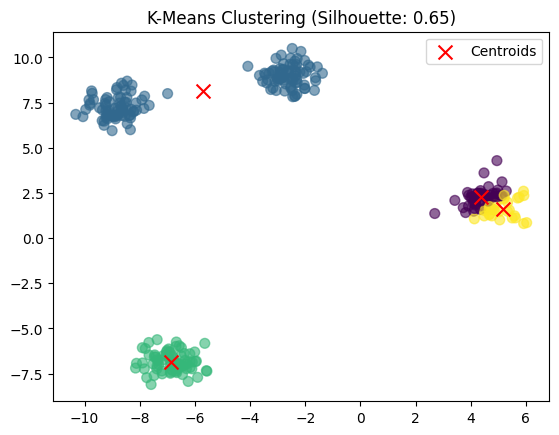

In [213]:
# Генерация данных
from sklearn.datasets import make_blobs  # Для создания синтетического набора данных
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
# X: массив точек (300 точек, каждая с двумя признаками x/y)

# Применяем K-Means
kmeans = KMeans(n_clusters=4)  # Создаём модель с 4 кластерами
kmeans.fit(X)  # Обучаем модель на данных X
labels = kmeans.predict(X)  # Присваиваем метки кластеров данным

# Расчёт коэффициента силуэта
silhouette_avg = silhouette_score(X, labels)  # Оценка качества кластеризации
print(f"Silhouette Score: {silhouette_avg:.2f}")  # Вывод коэффициента силуэта

# Визуализация кластеров
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)  # Точки данных, цвет определяется кластером
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')  # Центроиды
plt.title(f'K-Means Clustering (Silhouette: {silhouette_avg:.2f})')  # Заголовок графика с коэффициентом силуэта
plt.legend()  # Легенда для обозначения центроидов
plt.show()  # Отображение графика

> **Подсказка.** Если всё сделано верно, то должен получиться коэффициент силуэта в районе 0,45.

## DBSCAN

> **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который группирует точки в кластеры на основе плотности данных. Он хорошо подходит для кластеризации данных с произвольной формой, а также для выявления выбросов или шума.

Алгоритм основывается на гипотезе, что точки внутри одного кластера имеют более высокую плотность, чем точки между кластерами. DBSCAN не требует заранее заданного количества кластеров (в отличие от, например, K-Means), а вместо этого определяет кластеры как области, где точки расположены плотно (близко).


DBSCAN делит все данные на 3 типа точек:

* **Ядровая точка** (англ. сore point) — точка, которая имеет достаточное количество соседей (не менее определённого числа `min_samples`) в заданном радиусе `eps`. Эти точки образуют центры кластеров.
* **Граничная точка** (англ. border point) — точка, которая не является ядровой, но лежит внутри заданного радиуса от ядровой точки. Она входит в кластер, но сама не может его образовать.
* **Шум** (англ. noise) — точки, которые нельзя отнести ни к одному кластеру, потому что у них недостаточно соседей и они не могут быть частью какого-то кластера.

**Алгоритм DBSCAN**

1. Представим, что у нас есть изначальный датасет $D$, который мы хотим использовать в качестве обучающей выборки. Для того чтобы запустить DВSCAN, нам нужно задать два гиперпараметра — расстояние $e$, которое будет использоваться для получения окрестности наблюдения, и $N$ — некое количество точек.

2. Случайным образом выбираем точку $А$ из $D$ и выделяем её окрестность с помощью расстояния $е$ (выбираем из точек, в которых мы не были — при первом прогоне выбирается любая точка).

3. Если в окрестности $А$ есть $N$ точек,  $А$ становится первой точкой нового кластера, в противном случае она отмечается как выброс.

   - Точки из окрестности $А$ помечаем как часть кластера, изучаем окрестность каждой из них, отмечая, что мы в ней были. Если в их окрестности точек меньше чем $N$, помечаем точку как граничную.
4. Повторяем пункт З, пока не обойдём все точки кластера.
5. Повторяем пункты 2–3, пока все точки не окажутся просмотренными.

**Преимущества DBSCAN**

* DBSCAN может находить кластеры произвольной формы.
* DBSCAN автоматически выявляет выбросы (точки, которые не принадлежат ни одному кластеру).
* Алгоритм не требует заранее заданного числа кластеров, что делает его крайне гибким.
* DBSCAN хорошо работает с большими объёмами данных.

**Недостатки DBSCAN**

* Алгоритм чувствителен к параметрам `eps` и `min_samples`. Неправильно подобранные значения могут привести к плохим результатам.
* Если данные имеют разную плотность, DBSCAN может не выявить все кластеры.
* Алгоритм может работать плохо на данных с высокими размерами пространства, так как вычисление расстояний между точками может быть слишком затратным.

### Задача 2 [5 баллов]

Реализуй алгоритм DBSCAN, расcчитай коэффициент силуэта и визуализируй получившиеся кластеры. **[5 баллов]**

In [214]:
import numpy as np
from collections import deque
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [215]:
def dbscan(X, eps, min_samples):
    """
    Реализация алгоритма DBSCAN.

    Параметры:
    - X: Входные данные (numpy array) формы (n_samples, n_features).
    - eps: Радиус соседства (максимальное расстояние между точками).
    - min_samples: Минимальное количество точек, чтобы образовать кластер.

    Возвращает:
    - labels: Массив меток кластеров для каждой точки (–1 для шума).
    """
    n_samples = X.shape[0]
    labels = -np.ones(n_samples)  # Все точки изначально помечены как шум (–1)
    cluster_id = 0

    def region_query(point_idx):
        """Находит индексы точек в пределах eps от точки с индексом point_idx."""
        distances = np.sqrt(np.sum((X-X[point_idx])**2, axis=1))
        return np.where(distances <= eps)[0]

    for point_idx in range(n_samples):
        if labels[point_idx] != -1:  # Если точка уже была посещена, пропускаем
            continue

        # Найти соседей текущей точки
        neighbors = region_query(point_idx)

        # Если соседей меньше min_samples, помечаем как шум
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            # Формируем новый кластер
            labels[point_idx] = cluster_id
            queue = deque(neighbors) # Почитай документацию deque

            while queue:
                neighbor_idx = queue.popleft()# Почитай документацию deque
                if labels[neighbor_idx] == -1:
                    # Если точка была шумом, теперь становится частью кластера
                    labels[neighbor_idx] = cluster_id
                # Если точка уже посещена, пропускаем
                elif labels[neighbor_idx]!=-1:
                    continue

                # Найти соседей и добавить их в очередь, если они ещё не в кластере
                sub_neighbors = region_query(neighbor_idx)
                if len(sub_neighbors) >= min_samples:
                    queue.extend(sub_neighbors) # Почитай документацию deque

            # Переход к следующему кластеру
            cluster_id += 1

    return labels

In [216]:
# Создаём данные (например, «полумесяцы»)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Запускаем DBSCAN
labels = dbscan(X, eps=0.2, min_samples=5)

# Вычисляем коэффициент силуэта
if labels.shape[0]>1:  # Проверка, что есть хотя бы два кластера
    silhouette_avg = silhouette_score(X, labels).mean()
    print(silhouette_avg)
else:
    print("Кластеры не найдены или все точки помечены как шум.")

# Визуализация результатов
# Твой код — смотри пример с K-Means

0.33078776489960326


> **Подсказка.** Если всё сделано верно, то должен получиться коэффициент силуэта около 0,33.

## Задача 3 [3,5 баллов + 1,5 дополнительных балла]

Есть набор данных, содержащий несколько кластеров различной плотности и шума. Задача состоит в том, чтобы кластеризовать эти данные с использованием алгоритмов K-Means, DBSCAN и [Gaussian Mixture Models (GMM)](https://scikit-learn.org/1.5/modules/mixture.html), а затем оценить их эффективность с помощью коэффициента силуэта и других метрик.

**Шаги задания**

1.  Создание данных **[0,5 балла]**

  Используя генератор данных, создай набор с несколькими кластерами ([make_blobs](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_blobs.html)):

 * один кластер с высокой плотностью;
 * один кластер с низкой плотностью;
 * несколько выбросов (шумных точек).

2. Кластеризация **[0,5 балла]**

  Выполни кластеризацию с использованием следующих алгоритмов:

 * K-Means;
 * DBSCAN;
 * Gaussian Mixture Models (GMM).

3. Оценка качества кластеризации **[1 балл]**

  Для каждого алгоритма:

 * визуализируй полученные результаты;
 * рассчитай коэффициент силуэта для оценки качества кластеризации;
 * для DBSCAN также оцени количество выбросов (точек, помеченных как шум);
 * для GMM исследуй, как алгоритм справляется с различной плотностью кластеров.

4. Сравнение и анализ **[1,5 балла]**

  Ответь на вопросы:

 * Какие алгоритмы лучше справляются с данными, имеющими разные плотности?
 * Какие алгоритмы выделяют шумовые точки и как это влияет на качество кластеризации?
 * Почему K-Means может не подходить для кластеров с различной плотностью?

5. Дополнительные вопросы на рассуждение **[1,5 дополнительных балла]**
 > **Примечание.** Здесь можно и нужно пользоваться дополнительной литературой.

  * Что будет, если данные содержат большое количество выбросов?
  * Как можно выбрать оптимальные параметры (например, количество кластеров для K-Means или радиус соседства для DBSCAN)?
  * Как GMM справляется с кластерами, имеющими разные формы и плотности?

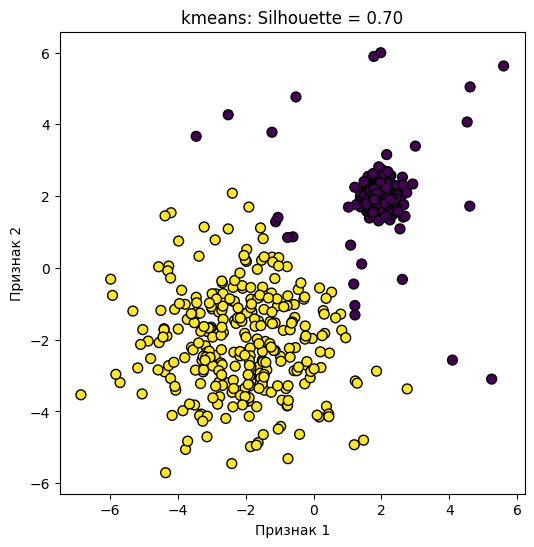

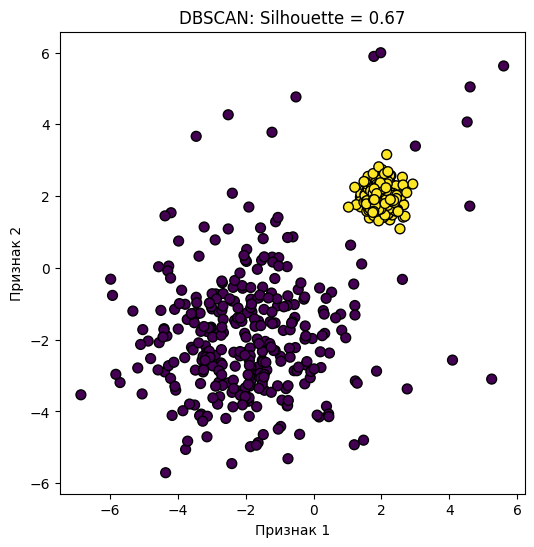

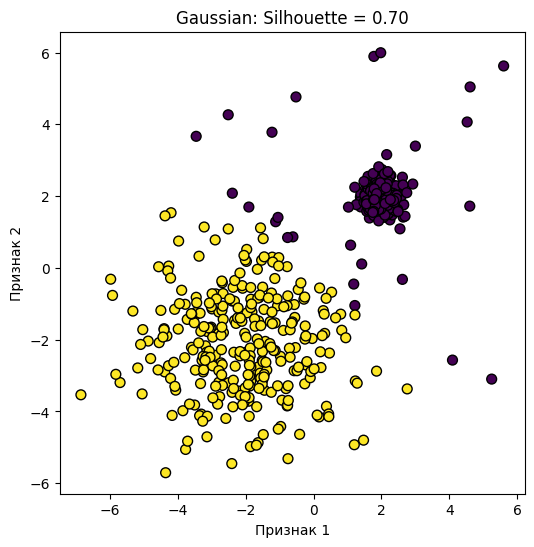

In [217]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def show(X, preds, model):
    silhouette = silhouette_score(X, preds)
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=preds, cmap="viridis", edgecolor="k", s=50)
    plt.title(f"{model}: Silhouette = {silhouette:.2f}")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.show()

# Генерация кластеров
centers = [[2, 2], [-2, -2]]
X1, _ = make_blobs(
    n_samples=300, centers=[centers[0]], cluster_std=0.3, random_state=42
)  # высокая плотность
X2, _ = make_blobs(
    n_samples=300, centers=[centers[1]], cluster_std=1.5, random_state=42
)  # низкая плотность

# Генерация выбросов
outliers = np.random.uniform(low=-6, high=6, size=(30, 2))

# Объединение данных
X = np.vstack([X1, X2, outliers])


model = KMeans(n_clusters=2, random_state=42)
preds = model.fit_predict(X)
show(X, preds, "kmeans")


model = DBSCAN(eps=0.5, min_samples=30)
preds = model.fit_predict(X)
show(X, preds, "DBSCAN")


model = GaussianMixture(n_components=2, covariance_type="tied", random_state=42)
preds = model.fit_predict(X)
show(X, preds, "Gaussian")

 * Какие алгоритмы лучше справляются с данными, имеющими разные плотности?
 
 DBSCAN и GMM

 * Какие алгоритмы выделяют шумовые точки и как это влияет на качество кластеризации?

 DBSCAN - положительно влияет на качество кластеризации

 * Почему K-Means может не подходить для кластеров с различной плотностью?

 Потому что он предпологает, что кластеры имею гиперсферическую форму

  * Что будет, если данные содержат большое количество выбросов?

Кластеры будут зашумлен

  * Как можно выбрать оптимальные параметры (например, количество кластеров для K-Means или радиус соседства для DBSCAN)?

  Метод локтя - график суммы квадратов ошибок от числа кластеров и поиск точки перегиба + по анализу силуэта, k-distance graph, перебор

  * Как GMM справляется с кластерами, имеющими разные формы и плотности?
  
  Хорошо справляется
